<a href="https://colab.research.google.com/github/Mal-Lem/Models_r-gression_lin-aire/blob/main/R%C3%A9gression_Lin%C3%A9aire_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

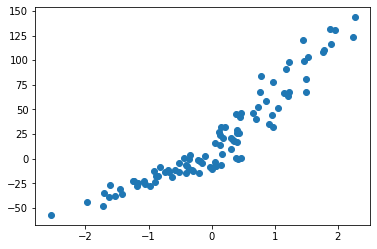

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

np.random.seed(0) # permet de reproduire l'aléatoire

x, y = make_regression(n_samples=100, n_features=1, noise = 10) # creation d'un dataset (x, y) linéaire
y = y + abs(y/2)  # modifie les valeurs de y pour rendre le dataset non-linéaire

plt.scatter(x, y) # afficher les résultats. x en abscisse et y en ordonnée

In [2]:
# Verification des dimensions
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100,)
(100, 1)


In [3]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones(x.shape))) #2eme et 3eme colonnes 
X = np.hstack((x**2 , X))

print(X.shape)
print(X[:15])

(100, 3)
[[ 0.12927848 -0.35955316  1.        ]
 [ 0.95382381  0.97663904  1.        ]
 [ 0.1618788   0.40234164  1.        ]
 [ 0.66120688 -0.81314628  1.        ]
 [ 0.78816353 -0.88778575  1.        ]
 [ 0.19701457  0.44386323  1.        ]
 [ 0.95507205 -0.97727788  1.        ]
 [ 0.18346819  0.42833187  1.        ]
 [ 0.04337847  0.20827498  1.        ]
 [ 0.09706498 -0.31155253  1.        ]
 [ 0.26092189 -0.51080514  1.        ]
 [ 0.01610668  0.12691209  1.        ]
 [ 2.36004466 -1.53624369  1.        ]
 [ 0.16142792 -0.40178094  1.        ]
 [ 0.42721727  0.6536186   1.        ]]


In [4]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(3, 1)
theta

array([[1.76405235],
       [0.40015721],
       [0.97873798]])

In [5]:
def model(X, theta):
    return X.dot(theta)

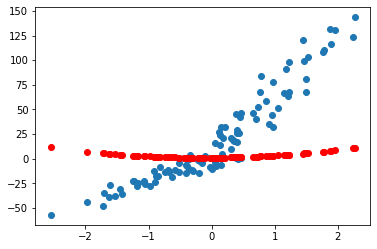

In [6]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

In [8]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [9]:
cost_function(X, y, theta)

1181.5228812416951

In [10]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [11]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [13]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [14]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[ 8.6007094 ],
       [42.23119849],
       [ 8.18156861]])

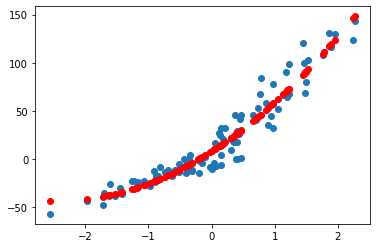

In [15]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

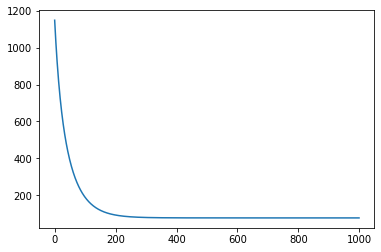

In [16]:
plt.plot(range(n_iterations), cost_history)

In [17]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [18]:
coef_determination(y, predictions)

0.9287186491853539

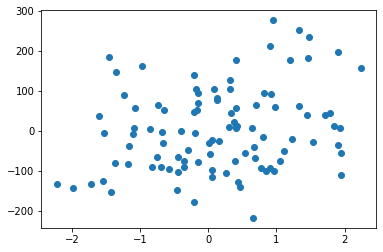

In [21]:
np.random.seed(0) # permet de reproduire l'aléatoire

x, y = make_regression(n_samples=100, n_features=2, noise = 10) # creation d'un dataset (x, y) linéaire

plt.scatter(x[:,0], y) # afficher les résultats. x en abscisse et y en ordonnée

In [45]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y) # affiche en 3D la variable x_1, x_2, et la target y

# affiche les noms des axes
ax.set_xlabel('x_1') 
ax.set_ylabel('x_2')
ax.set_zlabel('y')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'y')

In [31]:
# Verification des dimensions
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 2)
(100,)
(100, 1)


In [32]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones((x.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)

print(X.shape)
print(X[:10])

(100, 3)
[[ 1.05445173 -1.07075262  1.        ]
 [-0.36274117 -0.63432209  1.        ]
 [-0.85409574  0.3130677   1.        ]
 [ 1.3263859   0.29823817  1.        ]
 [-0.4615846  -1.31590741  1.        ]
 [ 1.94362119 -1.17312341  1.        ]
 [-1.60205766  0.62523145  1.        ]
 [-0.40178094  0.17742614  1.        ]
 [-0.97727788  1.86755799  1.        ]
 [ 0.37816252  0.15494743  1.        ]]


In [33]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

array([[-0.82646112],
       [ 0.78420863],
       [-0.1954172 ]])

In [34]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [35]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final

array([[28.67154616],
       [97.29524926],
       [-0.511481  ]])

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)
# affiche les noms des axes
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'y')

In [37]:
plt.plot(range(n_iterations), cost_history)

In [38]:
coef_determination(y, predictions)

0.9916687122277607